In [1]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['VV']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close  volume ticker
 date                                                     
 2015-01-15   92.58   92.69   91.37   91.44  132171     VV
 2015-01-16   91.26   92.69   91.24   92.58  127697     VV
 2015-01-20   92.97   93.10   91.97   92.80  169534     VV
 2015-01-21   92.54   93.48   92.30   93.31  346565     VV
 2015-01-22   93.86   94.76   93.00   94.69  179741     VV
 ...            ...     ...     ...     ...     ...    ...
 2019-12-24  147.65  147.65  147.38  147.59   77589     VV
 2019-12-26  147.77  148.31  147.59  148.31  101581     VV
 2019-12-27  148.70  148.70  148.08  148.26  128849     VV
 2019-12-30  148.39  148.39  147.24  147.44  227833     VV
 2019-12-31  147.16  147.94  147.00  147.84  206680     VV
 
 [1249 rows x 6 columns]]

In [4]:
vv = data[0]
vv.to_csv('vv.csv', encoding='utf-8')

In [5]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [6]:
data = clean_data(data)

In [7]:
data

[              open    high     low   close  volume ticker
 date                                                     
 2015-01-15   92.58   92.69   91.37   91.44  132171     VV
 2015-01-16   91.26   92.69   91.24   92.58  127697     VV
 2015-01-20   92.97   93.10   91.97   92.80  169534     VV
 2015-01-21   92.54   93.48   92.30   93.31  346565     VV
 2015-01-22   93.86   94.76   93.00   94.69  179741     VV
 ...            ...     ...     ...     ...     ...    ...
 2019-12-24  147.65  147.65  147.38  147.59   77589     VV
 2019-12-26  147.77  148.31  147.59  148.31  101581     VV
 2019-12-27  148.70  148.70  148.08  148.26  128849     VV
 2019-12-30  148.39  148.39  147.24  147.44  227833     VV
 2019-12-31  147.16  147.94  147.00  147.84  206680     VV
 
 [1249 rows x 6 columns]]

In [8]:
ts = data[0]['close']

## ARIMA analysis

In [26]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [27]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [9]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8652      0.079    -10.973      0.000      -1.020      -0.711
ar.L2         -0.0607      0.020     -3.083      0.002      -0.099      -0.022
ma.L1          0.1679      2.796      0.060      0.952      -5.311       5.647
ma.L2         -1.1679      3.299     -0.354      0.723      -7.634       5.299
ma.S.L5       -0.0603      0.024     -2.514      0.012      -0.107      -0.013
ma.S.L10      -0.0196      0.021     -0.931      0.352      -0.061       0.022
sigma2         0.6473      1.835      0.353      0.724      -2.950       4.245


In [10]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('vv_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.8652,0.079,-10.973,0.000,-1.020,-0.711
2,ar.L2,-0.0607,0.020,-3.083,0.002,-0.099,-0.022
3,ma.L1,0.1679,2.796,0.060,0.952,-5.311,5.647
4,ma.L2,-1.1679,3.299,-0.354,0.723,-7.634,5.299
5,ma.S.L5,-0.0603,0.024,-2.514,0.012,-0.107,-0.013
6,ma.S.L10,-0.0196,0.021,-0.931,0.352,-0.061,0.022
7,sigma2,0.6473,1.835,0.353,0.724,-2.950,4.245


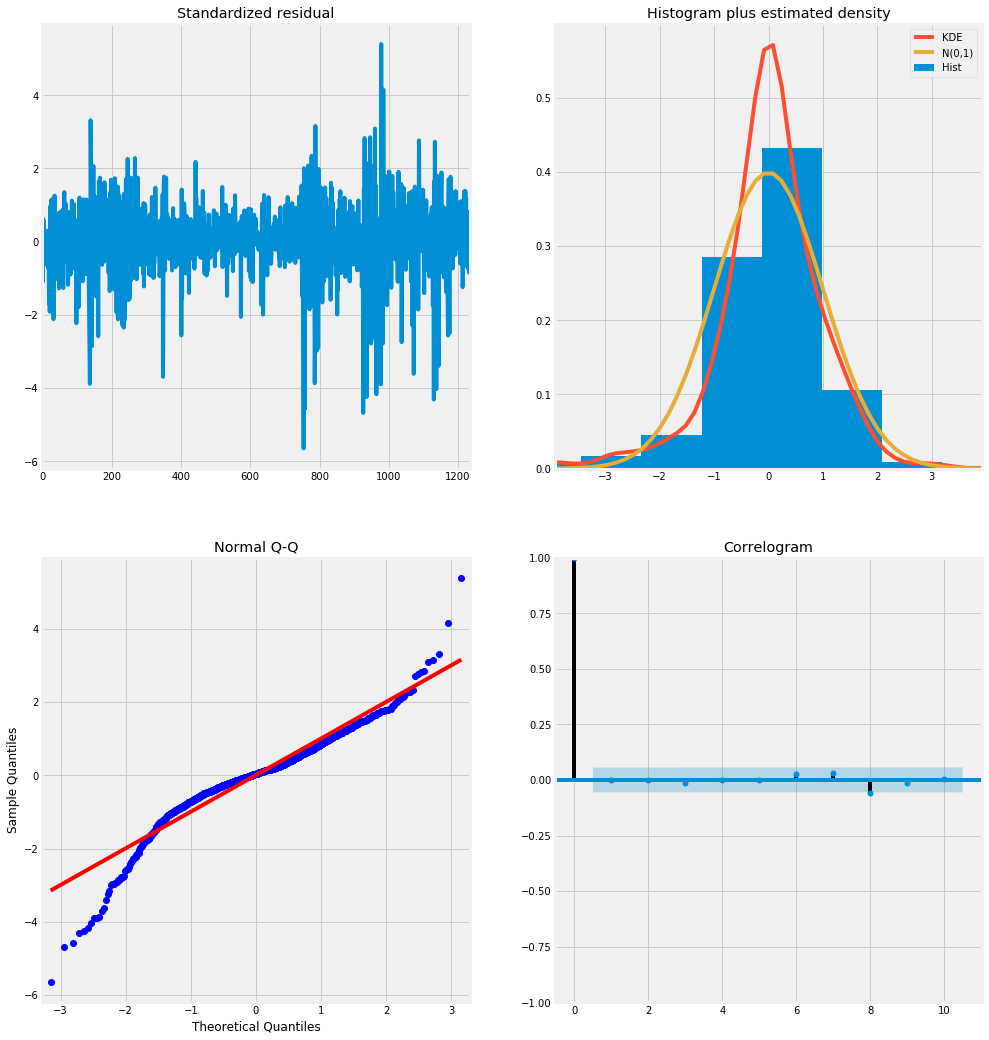

In [11]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('vvoutput.png')
plt.show()

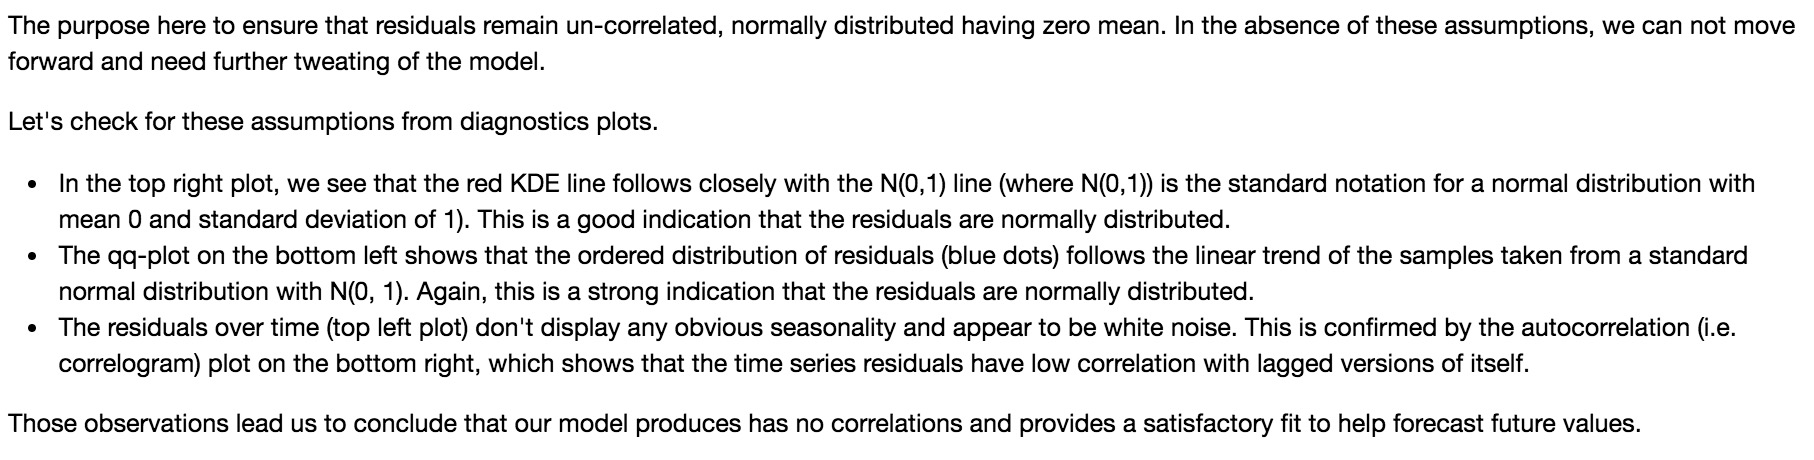

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [12]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

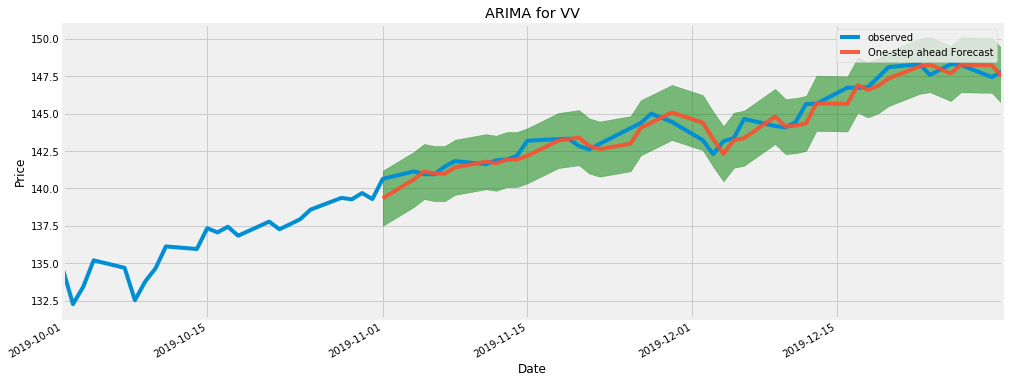

In [13]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019-10':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
plt.title('ARIMA for VV')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('vv_arima.png')
plt.show()

In [14]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.41


In [15]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

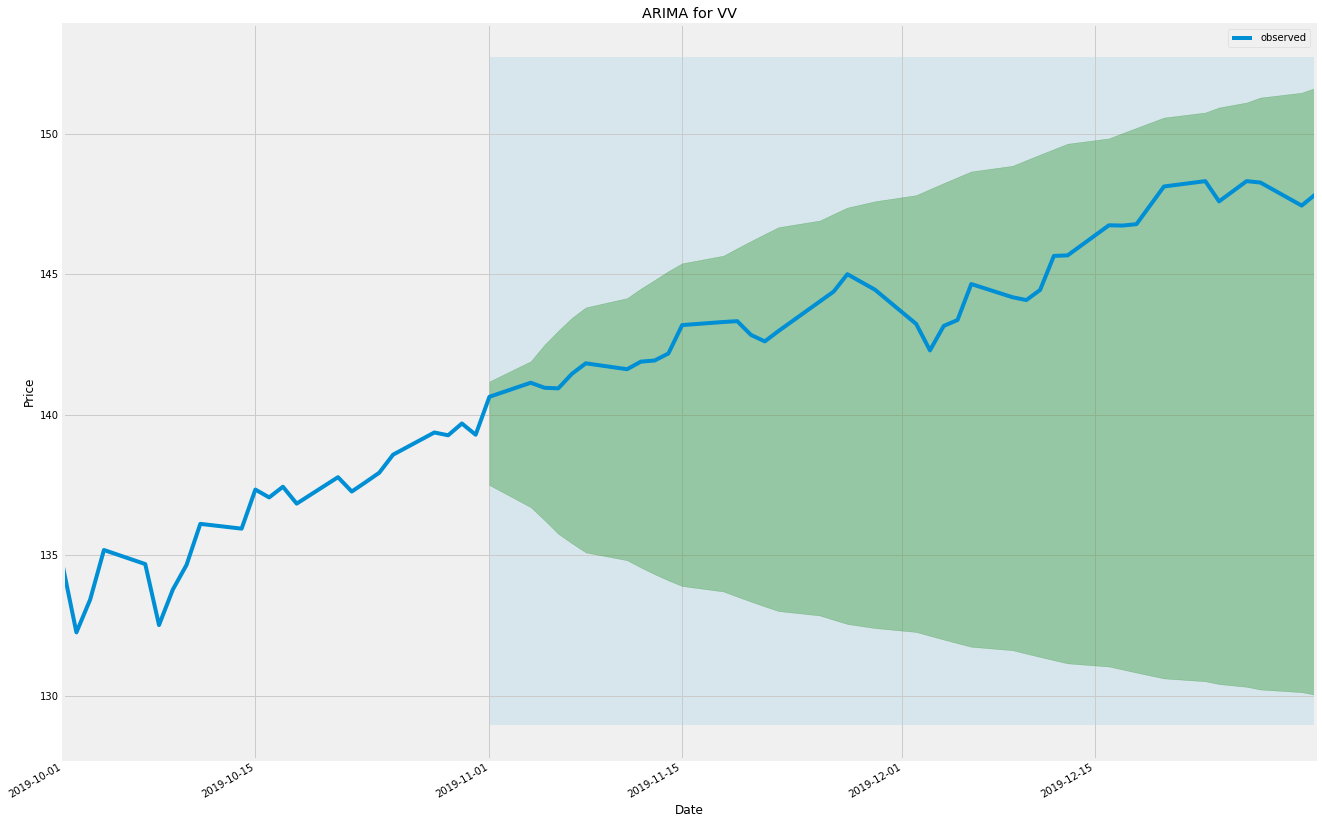

In [16]:
ax = ts['2019-10':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

plt.title('ARIMA for VV')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('vv_arima2.png')
plt.show()

In [17]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 21.54


In [18]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [19]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

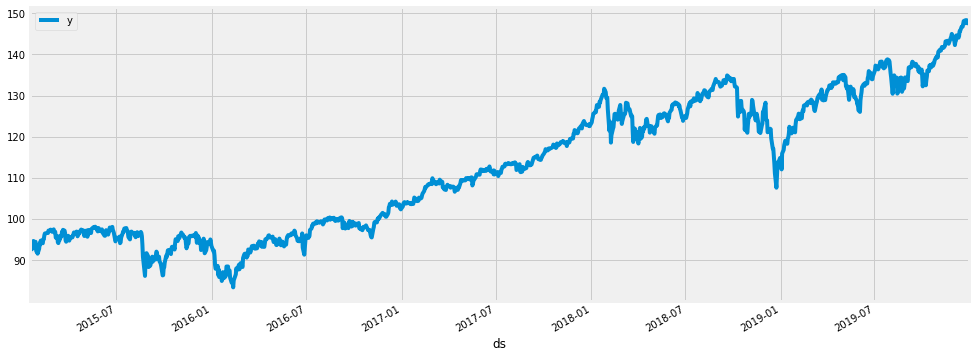

In [20]:
spy.set_index('ds').plot()

In [21]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [22]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [23]:
spy_df_novjan = df.tail(71)
spy_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [46]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [49]:
# pull_df

In [24]:
spy_yf = pd.read_csv('VV_yf.csv')
spy_yf = spy_yf.rename(columns={"Date": "ds"})
spy_yf['ds'] = pd.to_datetime(spy_yf['ds'])

spy_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [25]:
spy_yf1 = spy_yf[['ds','Adj Close']]
spy_yf1

,ds,Adj Close
0,2019-11-01,139.911713
1,2019-11-04,140.409134
2,2019-11-05,140.230072
3,2019-11-06,140.210175
4,2019-11-07,140.727478
5,2019-11-08,141.095566
6,2019-11-11,140.886642
7,2019-11-12,141.155243
8,2019-11-13,141.195038
9,2019-11-14,141.443741


In [26]:
comb = spy_df_novjan.join(spy_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('vv_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1249])
comb = comb.drop([1252])
comb = comb.drop([1253])
comb = comb.drop([1259])
comb = comb.drop([1260])
comb = comb.drop([1266])
comb = comb.drop([1267])
comb = comb.drop([1268])
comb = comb.drop([1273])
comb = comb.drop([1274])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1219,2019-11-18,142.429200,138.842995,146.431171,142.557953,0.128753,0.09%
1220,2019-11-19,142.640181,138.536459,146.337410,142.587799,-0.052382,-0.04%
1221,2019-11-20,142.771108,138.820900,146.383531,142.100327,-0.670781,-0.47%
1222,2019-11-21,142.922376,139.090817,146.747235,141.871521,-1.050855,-0.74%
1223,2019-11-22,143.055044,138.949428,146.866730,142.239594,-0.815450,-0.57%
1224,2019-11-25,143.421749,139.468290,147.310557,143.284164,-0.137585,-0.10%
1225,2019-11-26,143.641101,139.731951,147.619401,143.632355,-0.008746,-0.01%
1226,2019-11-27,143.778129,139.740002,147.600128,144.249146,0.471017,0.33%
1227,2019-11-29,144.064034,140.209265,148.288491,143.701981,-0.362053,-0.25%
1228,2019-12-02,144.396723,140.676946,148.301082,142.488297,-1.908426,-1.34%


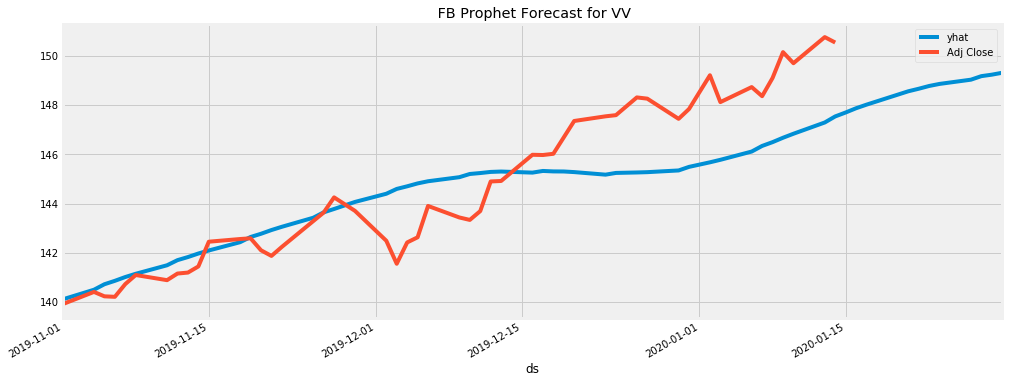

In [27]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.title(' FB Prophet Forecast for VV')
plt.savefig('vv_fbproph_forecast.png')

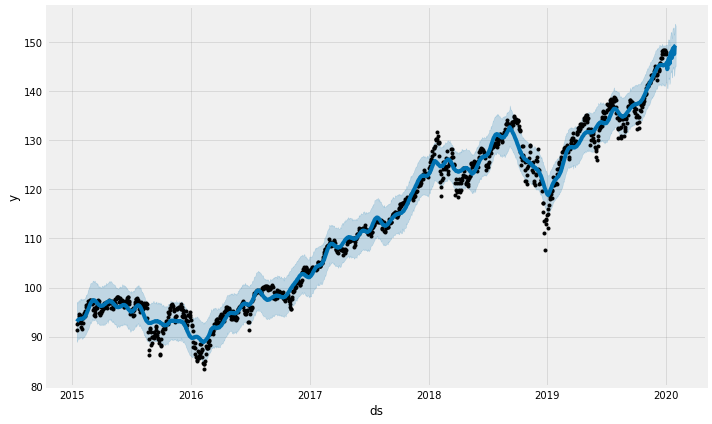

In [28]:
p.plot(df)
plt.savefig('vv_fbp2.png')

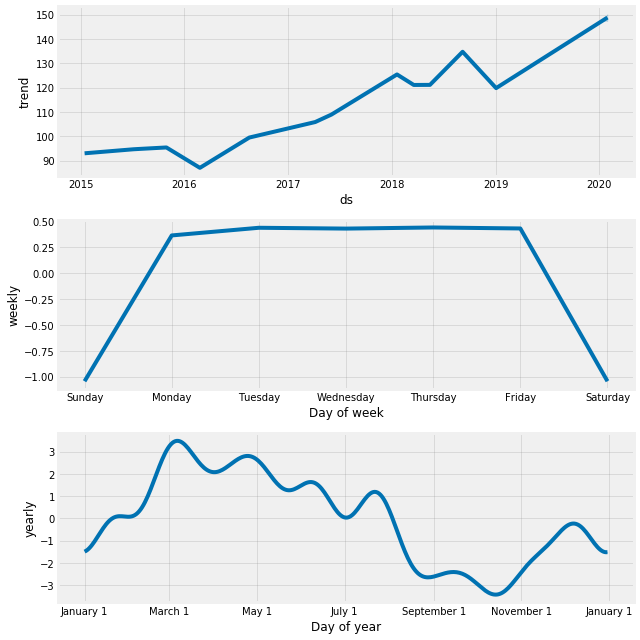

In [29]:
p.plot_components(out)
plt.savefig('jnk_seasonality.png')

In [57]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [58]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
pred = out[['ds', 'yhat']].set_index('ds')